In [1]:
%pylab

Using matplotlib backend: <object object at 0x7fe17807ca10>
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
noise = np.random.normal(0,1,100)

In [4]:
t = np.arange(100)

In [5]:
gw = 5 * np.sin(2*np.pi/10*t)

In [6]:
data = gw + noise

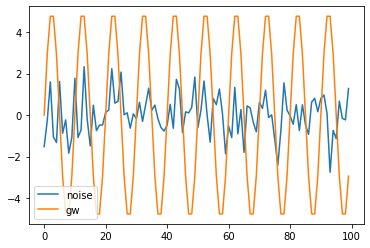

In [7]:
plt.plot(t,noise,label='noise')
plt.plot(t,gw,label='gw')
plt.legend()

$\mathcal{N}(0,1) = \frac{1}{\sqrt{2\pi}} \exp \left({-t^2}/2\right)$

# d = noise + gw = n+h

# likelihood = $\mathcal{L} = \prod_i \frac{1}{\sqrt{2\pi}}\exp\left( -(d_i-h_i)^2/2\right)$

$\ln \mathcal{L} \propto \sum_i -(d_i-h_i)^2 / 2$

$\ln \mathcal{L} \propto \sum_i -d_i^2/2$

ranking statistic = $\ln \mathcal{L}_1 - \ln \mathcal{L}_2 = \sum_i d_ih_i - h_i^2/2$

In [8]:
def matchfilter(d,h):
    result = d*h - h*h/2
    return np.sum(result)

In [9]:
h_true = gw

In [10]:
ranking = matchfilter(data,h_true)

In [11]:
def getbackground(template,size=100000):
    output = []
    for i in range(size):
        noise_simulation = np.random.normal(0,1,100)
        ranking_now = matchfilter(noise_simulation,template)
        output.append(ranking_now)
    return output

In [12]:
background_htrue = getbackground(h_true)

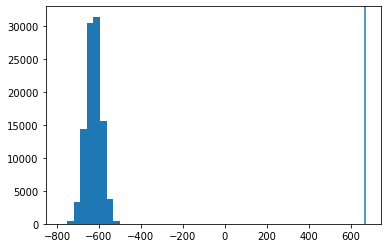

In [13]:
plt.hist(background_htrue)
plt.axvline(ranking)

In [14]:
len(np.where(background_htrue>ranking)[0])

0

In [15]:
len(np.where(background_htrue>ranking)[0])/100000

0.0

In [16]:
h1 = 3 * np.sin(2*np.pi/20*t)

In [17]:
h2 = 10* np.sin(2*np.pi/100*t)

In [18]:
h3 = 4.9 * np.sin(2*np.pi/10*t)

In [19]:
h4 = 5*np.sin(2*np.pi/9.9*t)

In [20]:
h5 = 5*np.sin(2*np.pi/8*t)

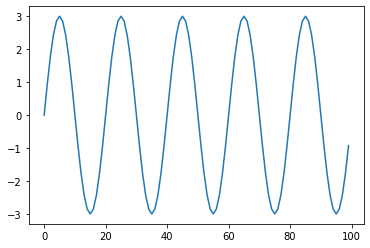

In [21]:
plt.plot(t,h1)

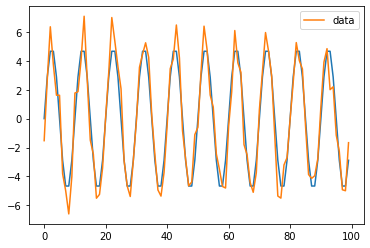

In [22]:
plt.plot(t,h3)
plt.plot(t,noise+gw,label='data')
plt.legend()

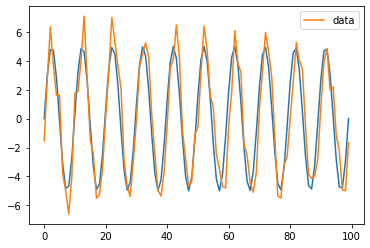

In [23]:
plt.plot(t,h4)
plt.plot(t,noise+gw,label='data')
plt.legend()

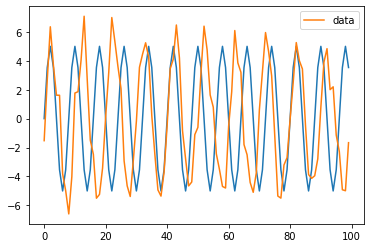

In [24]:
plt.plot(t,h5)
plt.plot(t,noise+gw,label='data')
plt.legend()

In [25]:
matchfilter(noise+gw,h5)

-593.1660339905998

In [26]:
h_true = 5 * np.sin(2*np.pi/10*t)

In [27]:
matchfilter(noise+gw,h1)

-206.27218039025874

In [28]:
matchfilter(noise+gw,h2)

-2413.6924860585104

In [29]:
matchfilter(noise+gw,h3)

669.0242185327721

In [30]:
matchfilter(noise+gw,h4)

611.2863945204467

In [31]:
matchfilter(noise+gw,h_true)

670.1777740130326

# 

In [32]:
background = []
for i in range(100000):
    noise_simulation = np.random.normal(0,1,100)
    ranking_now = matchfilter(noise_simulation,h_true)
    background.append(ranking_now)

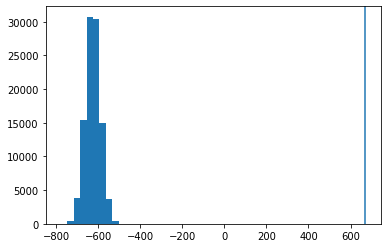

In [33]:
plt.hist(background)
plt.axvline(matchfilter(noise+gw,h_true))

# 对于一个比较差的模板，我们是否也可以找到引力波？

In [34]:
background_h5 = []
for i in range(100000):
    noise_simulation = np.random.normal(0,1,100)
    ranking_now = matchfilter(noise_simulation,h5)
    background_h5.append(ranking_now)

In [35]:
data = gw+noise

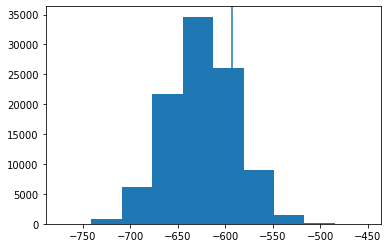

In [36]:
plt.hist(background_h5)
plt.axvline(matchfilter(data,h5))

In [37]:
len(np.where(background_h5>matchfilter(data,h5))[0])

18363

In [38]:
len(np.where(background_h5>matchfilter(data,h5))[0])/100000

0.18363

ranking statistic = $\ln \mathcal{L}_1 - \ln \mathcal{L}_2 = \sum_i d_ih_i - h_i^2/2$

$h = A\hat{h}$

$s = \sum_i d_i A\hat{h}_i - \sum_i A^2 \hat{h_i}^2/2$

$\frac{\partial s}{\partial A} = \sum_i d_i \hat{h}_i - A \hat{h_i}^2 = 0$  

----> $A = \frac{\sum_i d_i \hat{h_i}}{\sum_i \hat{h_i}^2}$

----> $s = \frac{1}{2}\frac{(\sum_i d_i\hat{h_i})^2}{\sum_i \hat{h}_i^2}$

Define a innver product: (a,b) = $\sum_i a_i b_i$

$s = \frac{1}{2} \frac{(a,\hat{h})^2}{(\hat{h},\hat{h})}$. Define real normalized h $\bar{h} = \frac{h}{\sqrt{(h,h)}}$, then $s = \frac{1}{2} (d,\bar{h})^2$

In [39]:
def matchfilter_v2(d,h):
    normal_h = h/np.sqrt(np.sum(h*h))
    s = 0.5*np.sum(d*normal_h)**2
    return s

In [40]:
def snr(d,h):
    normal_h = h/np.sqrt(np.sum(h*h))
    s = np.sum(d*normal_h)
    return s

In [41]:
matchfilter_v2(data,h_true)

670.9941865189415

In [42]:
h_1 = 0.5* np.sin(2*np.pi/10*t)

In [43]:
matchfilter_v2(data,h1)

0.38970136370556696

In [44]:
matchfilter_v2(data,h2)

0.7448986962760371

In [45]:
matchfilter_v2(data,h3)

670.9941865189415

In [46]:
matchfilter_v2(data,h4)

611.3089017554989

In [47]:
matchfilter_v2(data,h5)

0.40536055675505717

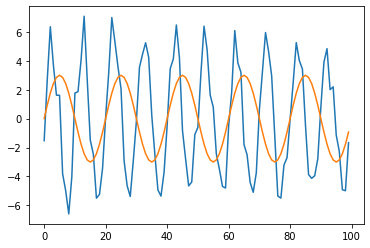

In [48]:
plt.plot(t,data)
plt.plot(t,h1)

In [49]:
def getbackground_v2(template,size=100000):
    output = []
    for i in range(size):
        noise_simulation = np.random.normal(0,1,100)
        ranking_now = matchfilter_v2(noise_simulation,template)
        output.append(ranking_now)
    return output

In [50]:
background_htrue = getbackground_v2(h_true)

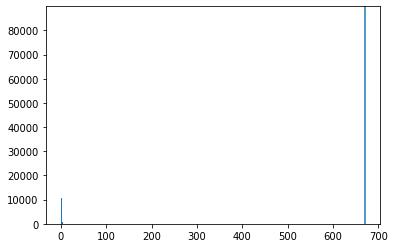

In [51]:
plt.hist(background_htrue)
plt.axvline(matchfilter_v2(data,h_true))

In [52]:
for a in arange(0.1,2,0.1):
    gw = a * sin(2*np.pi/10 * t)
    noise = np.random.normal(0,1,100)
    data = gw+noise
    template = gw
    ranking = matchfilter(data,template)
    size = 100000
    background = getbackground(template,size)
    false_num = len(np.where(background >= ranking)[0])
    false_alarm_rate = false_num 
    print('amp: %.2f'% a, 'FAR', false_alarm_rate,'SNR',snr(data,template))

amp: 0.10 FAR 23913 SNR 0.7091473908211261
amp: 0.20 FAR 55651 SNR -0.13891402701398248
amp: 0.30 FAR 93 SNR 3.09775732085678
amp: 0.40 FAR 9553 SNR 1.3126339459627563
amp: 0.50 FAR 0 SNR 4.911565210812257
amp: 0.60 FAR 0 SNR 4.411881299238513
amp: 0.70 FAR 0 SNR 5.161033607335936
amp: 0.80 FAR 0 SNR 4.4711072175265425
amp: 0.90 FAR 0 SNR 7.933245769944792
amp: 1.00 FAR 0 SNR 8.036739206968218
amp: 1.10 FAR 0 SNR 6.0001289512081915
amp: 1.20 FAR 0 SNR 8.525949581738171
amp: 1.30 FAR 0 SNR 7.715268188436256
amp: 1.40 FAR 0 SNR 8.922977311587918
amp: 1.50 FAR 0 SNR 9.88296924667339
amp: 1.60 FAR 0 SNR 11.808811256494431
amp: 1.70 FAR 0 SNR 12.390716640292451
amp: 1.80 FAR 0 SNR 12.603984324419807
amp: 1.90 FAR 0 SNR 13.442160169771034


In [53]:
for a in arange(0.1,2,0.1):
    gw = a * sin(2*np.pi/10 * t)
    noise = np.random.normal(0,1,100)
    data = gw+noise
    template = gw
    ranking = matchfilter_v2(data,template)
    size = 100000
    background = getbackground_v2(template,size)
    false_num = len(np.where(background >= ranking)[0])
    false_alarm_rate = false_num 
    print('amp: %.2f'% a, 'FAR', false_alarm_rate, 'SNR',snr(data,template))

amp: 0.10 FAR 70263 SNR 0.384219602939075
amp: 0.20 FAR 283 SNR 2.9810439915695186
amp: 0.30 FAR 2844 SNR 2.194220009084552
amp: 0.40 FAR 8676 SNR 1.7121565346342398
amp: 0.50 FAR 86 SNR 3.323528309625163
amp: 0.60 FAR 0 SNR 4.859567668603236
amp: 0.70 FAR 1 SNR 4.1108630736522045
amp: 0.80 FAR 0 SNR 7.118680498655456
amp: 0.90 FAR 0 SNR 4.911662682704428
amp: 1.00 FAR 0 SNR 5.735439596501075
amp: 1.10 FAR 0 SNR 8.298263825697731
amp: 1.20 FAR 0 SNR 10.321095830344955
amp: 1.30 FAR 0 SNR 8.602964474380306
amp: 1.40 FAR 0 SNR 8.890939894867275
amp: 1.50 FAR 0 SNR 9.782926413722155
amp: 1.60 FAR 0 SNR 12.43428707596613
amp: 1.70 FAR 0 SNR 12.912351188440057
amp: 1.80 FAR 0 SNR 13.544210887731591
amp: 1.90 FAR 0 SNR 13.710078761778057
